In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Git config

In [13]:
#git setup
import os
from google.colab import userdata
token = userdata.get('GITHUB_TOKEN')
email = userdata.get('email')
name = userdata.get('name')

if not os.path.exists('/content/cover-type-classifcation'):
    !git clone https://{token}@github.com/hiba-khadir/cover-type-classifcation.git

# configure Git
!git config --global user.email email
!git config --global user.name name

#to repo
%cd /content/cover-type-classifcation

#latest changes
!git pull

Cloning into 'cover-type-classifcation'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 15 (delta 2), reused 14 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (15/15), 12.70 MiB | 12.30 MiB/s, done.
Resolving deltas: 100% (2/2), done.
/content/cover-type-classifcation
Already up to date.


In [14]:
#load the data set
df = pd.read_csv("covertype.csv")
# create a copy
df_copy = df.copy()

# Dataset exploration

In [ ]:
#check missing values
print(df.isnull().sum().sum())
#info
print(df.shape)
print(df.info())

0
(581012, 55)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Unnamed: 0                          581012 non-null  int64
 1   Unnamed: 1                          581012 non-null  int64
 2   Unnamed: 2                          581012 non-null  int64
 3   Elevation                           581012 non-null  int64
 4   Aspect                              581012 non-null  int64
 5   Slope                               581012 non-null  int64
 6   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 7   Vertical_Distance_To_Hydrology      581012 non-null  int64
 8   Horizontal_Distance_To_Roadways     581012 non-null  int64
 9   Hillshade_9am                       581012 non-null  int64
 10  Hillshade_Noon                      581012 non-null  int64
 11  Hillshade_3pm                       5

In [ ]:
df = df.rename(columns={
    'Unnamed: 0': 'X_Coord',
    'Unnamed: 1': 'Y_Coord',
    'Unnamed: 2': 'Region_ID'
})
df.head()

,X_Coord,Y_Coord,Region_ID,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [ ]:
#split features into numerical and categorical
features = ['X_Coord','Y_Coord','Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways',
    'Hillshade_9am']
categorical_features = ['Hillshade_Noon','Hillshade_3pm','Wilderness_Area',
                        'Horizontal_Distance_To_Fire_Points','Region_ID']
soil_features = [f'Soil_Type{i}' for i in range(1, 41)]
categorical_features += soil_features

In [ ]:
#dispersion
df[features].describe()

,X_Coord,Y_Coord,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226
std,279.984734,111.913721,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210
min,1859.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2809.000000,58.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000
50%,2996.000000,127.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000
75%,3163.000000,260.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000
max,3858.000000,360.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000


In [ ]:
#interpreting Region_ID
unique_values = df['Region_ID'].unique()
print(unique_values)

# check rows
print(df[['Region_ID', 'Cover_Type', 'Elevation', 'Slope']].head(20))


[ 3  2  9 18  6  7  4 10 11 22  1  5 17 23  8 16 24 30 19 28 12 27 25 14
 13 26 15 33 20 21 31 32 29 40 34 36 39 35 48 47 46 49 45 44  0 37 41 38
 52 42 43 50 51 57 61 60 53 55 58 56 54 64 63 62 59 65 66]
    Region_ID  Cover_Type  Elevation  Slope
0           3           5        258    510
1           2           5        212    390
2           9           2        268   3180
3          18           2        242   3090
4           2           5        153    391
5           6           2        300     67
6           7           5        270    633
7           4           5        234    573
8           9           5        240    666
9          10           5        247    636
10          4           5        180    735
11         11           2        371   5253
12         22           2        150   3215
13          7           5        150    771
14          4           5         67    674
15          7           5         42    752
16          1           5        120    607
17 

## class distribution analysis

In [ ]:
print(df['Cover_Type'].values.min())
print(df['Cover_Type'].values.max())
print("the most frequent class is :",df['Cover_Type'].mode())
# ranges from 1 to 7 , 7 classes bimodal distribution

1
7
the most frequent class is : 0    2
Name: Cover_Type, dtype: int64


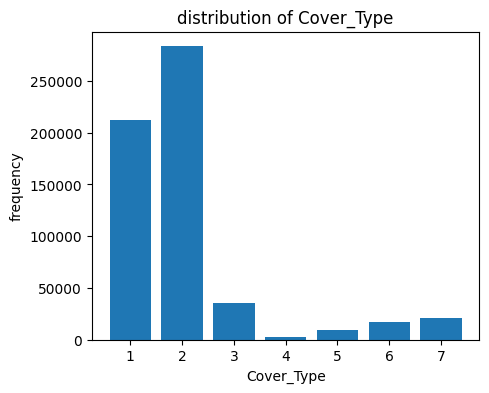

In [ ]:
counts = df['Cover_Type'].value_counts().sort_index()  # counts per class 1-7
plt.figure(figsize=(5,4))
plt.bar(counts.index, counts.values)
plt.xlabel('Cover_Type')
plt.ylabel('frequency')
plt.title('distribution of Cover_Type')
plt.show()

In [ ]:
# confirm unbalance
counts = df['Cover_Type'].value_counts()
print((counts / counts.sum()) * 100)  # percentage per class

Cover_Type
2    48.759922
1    36.460521
3     6.153746
7     3.530048
6     2.989095
5     1.633873
4     0.472796
Name: count, dtype: float64


We notice really high class imbalance in the dataset specifically between class 4 and 2:
- choose evaluation metrics other than accuracy
- look into tree based algos


## numerical features analysis

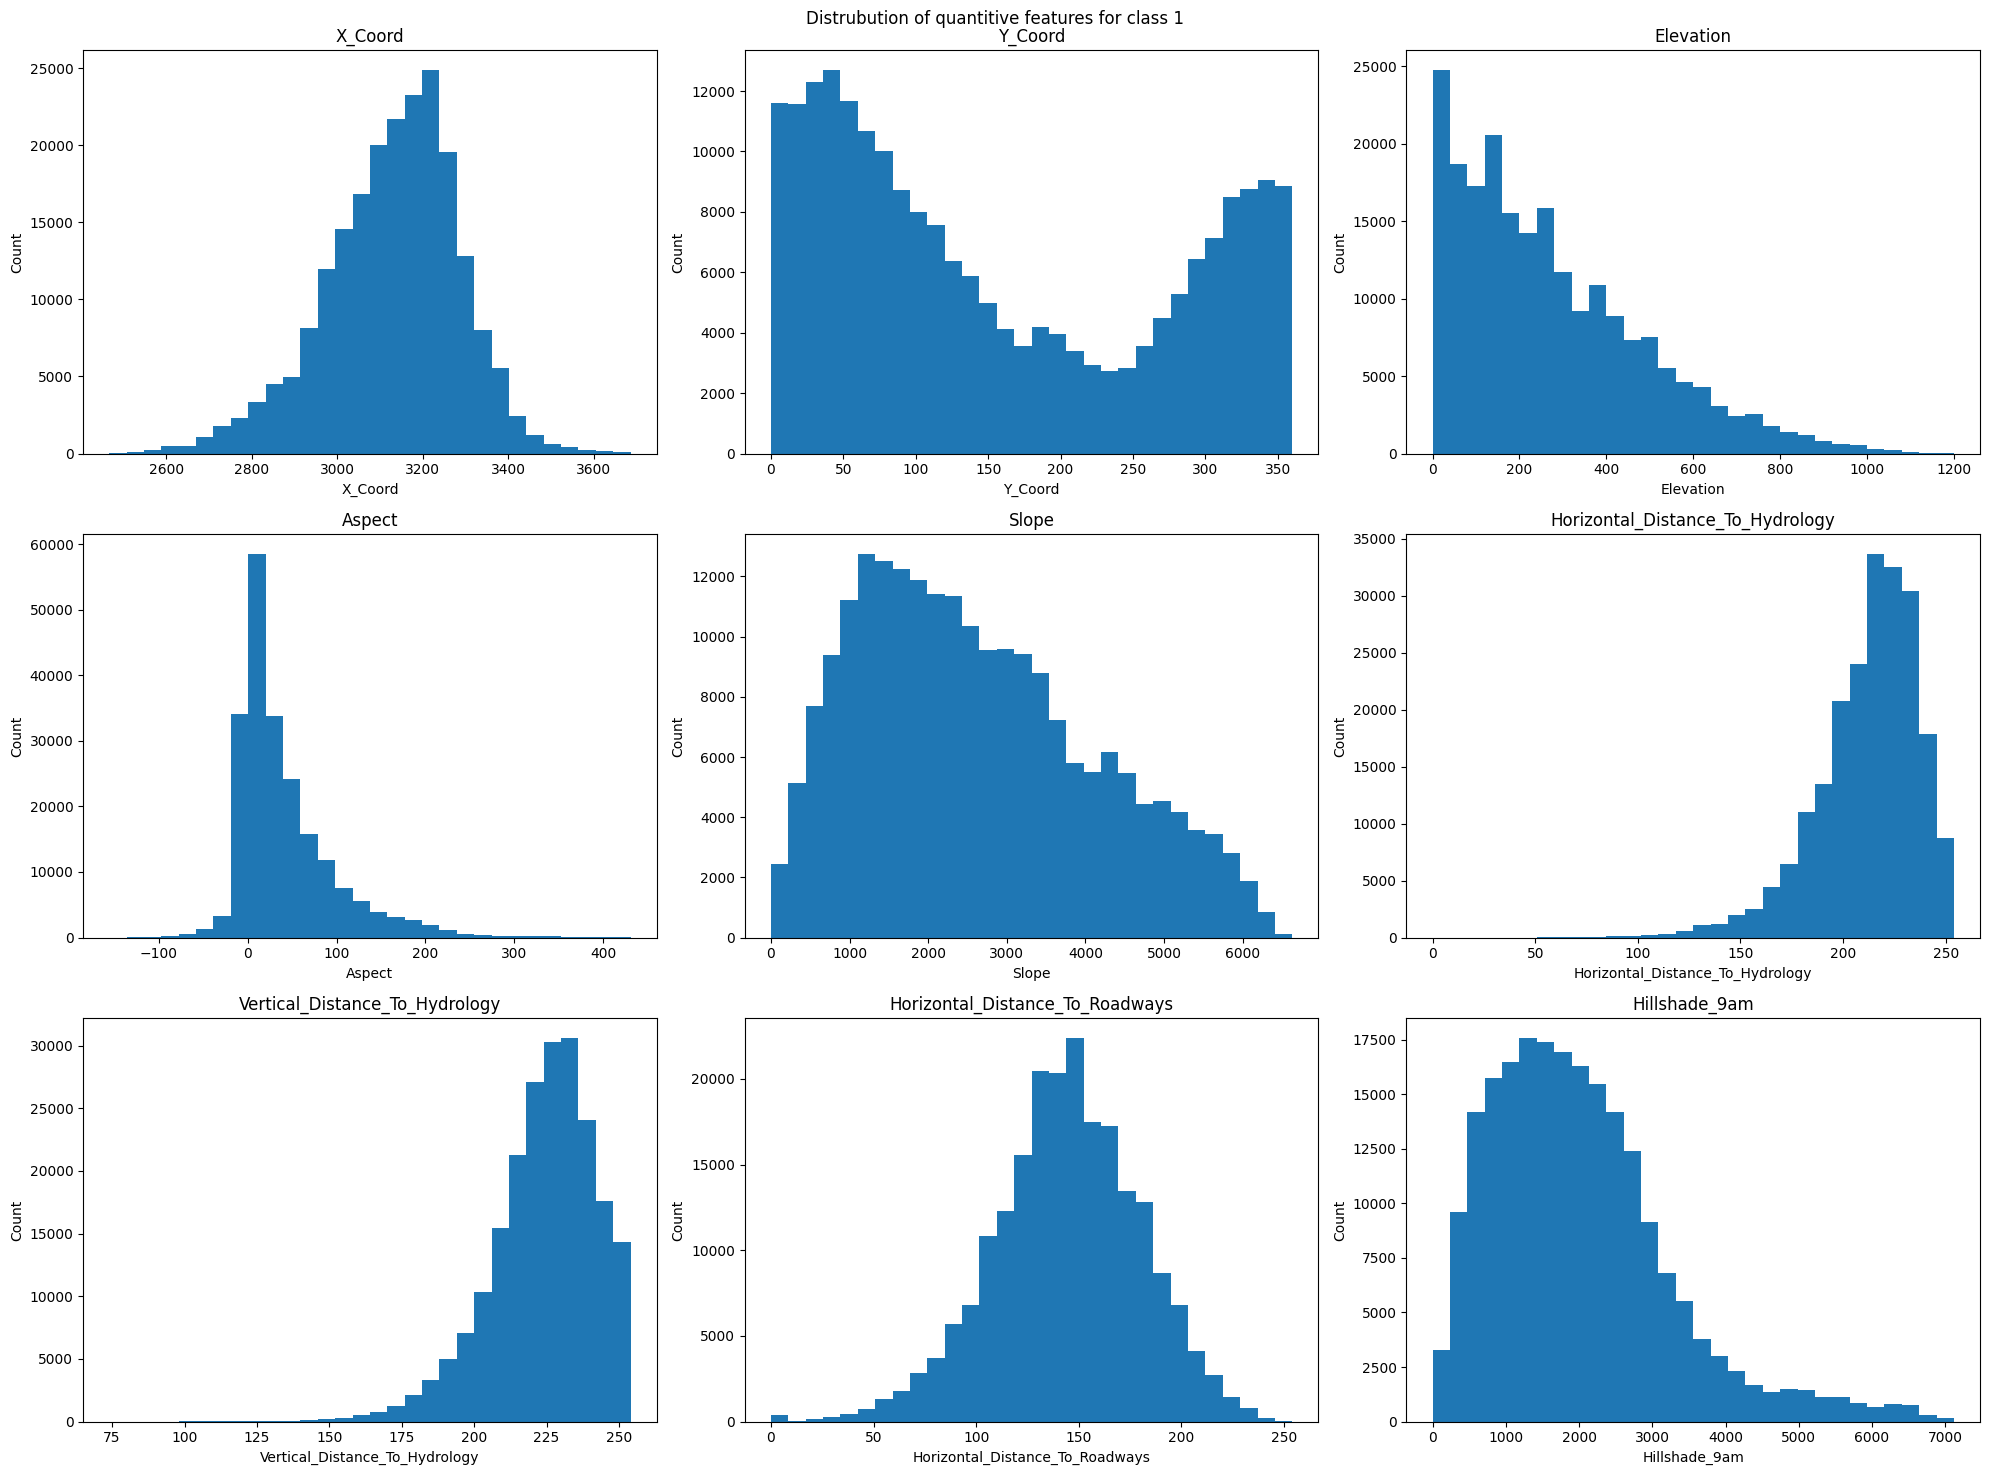

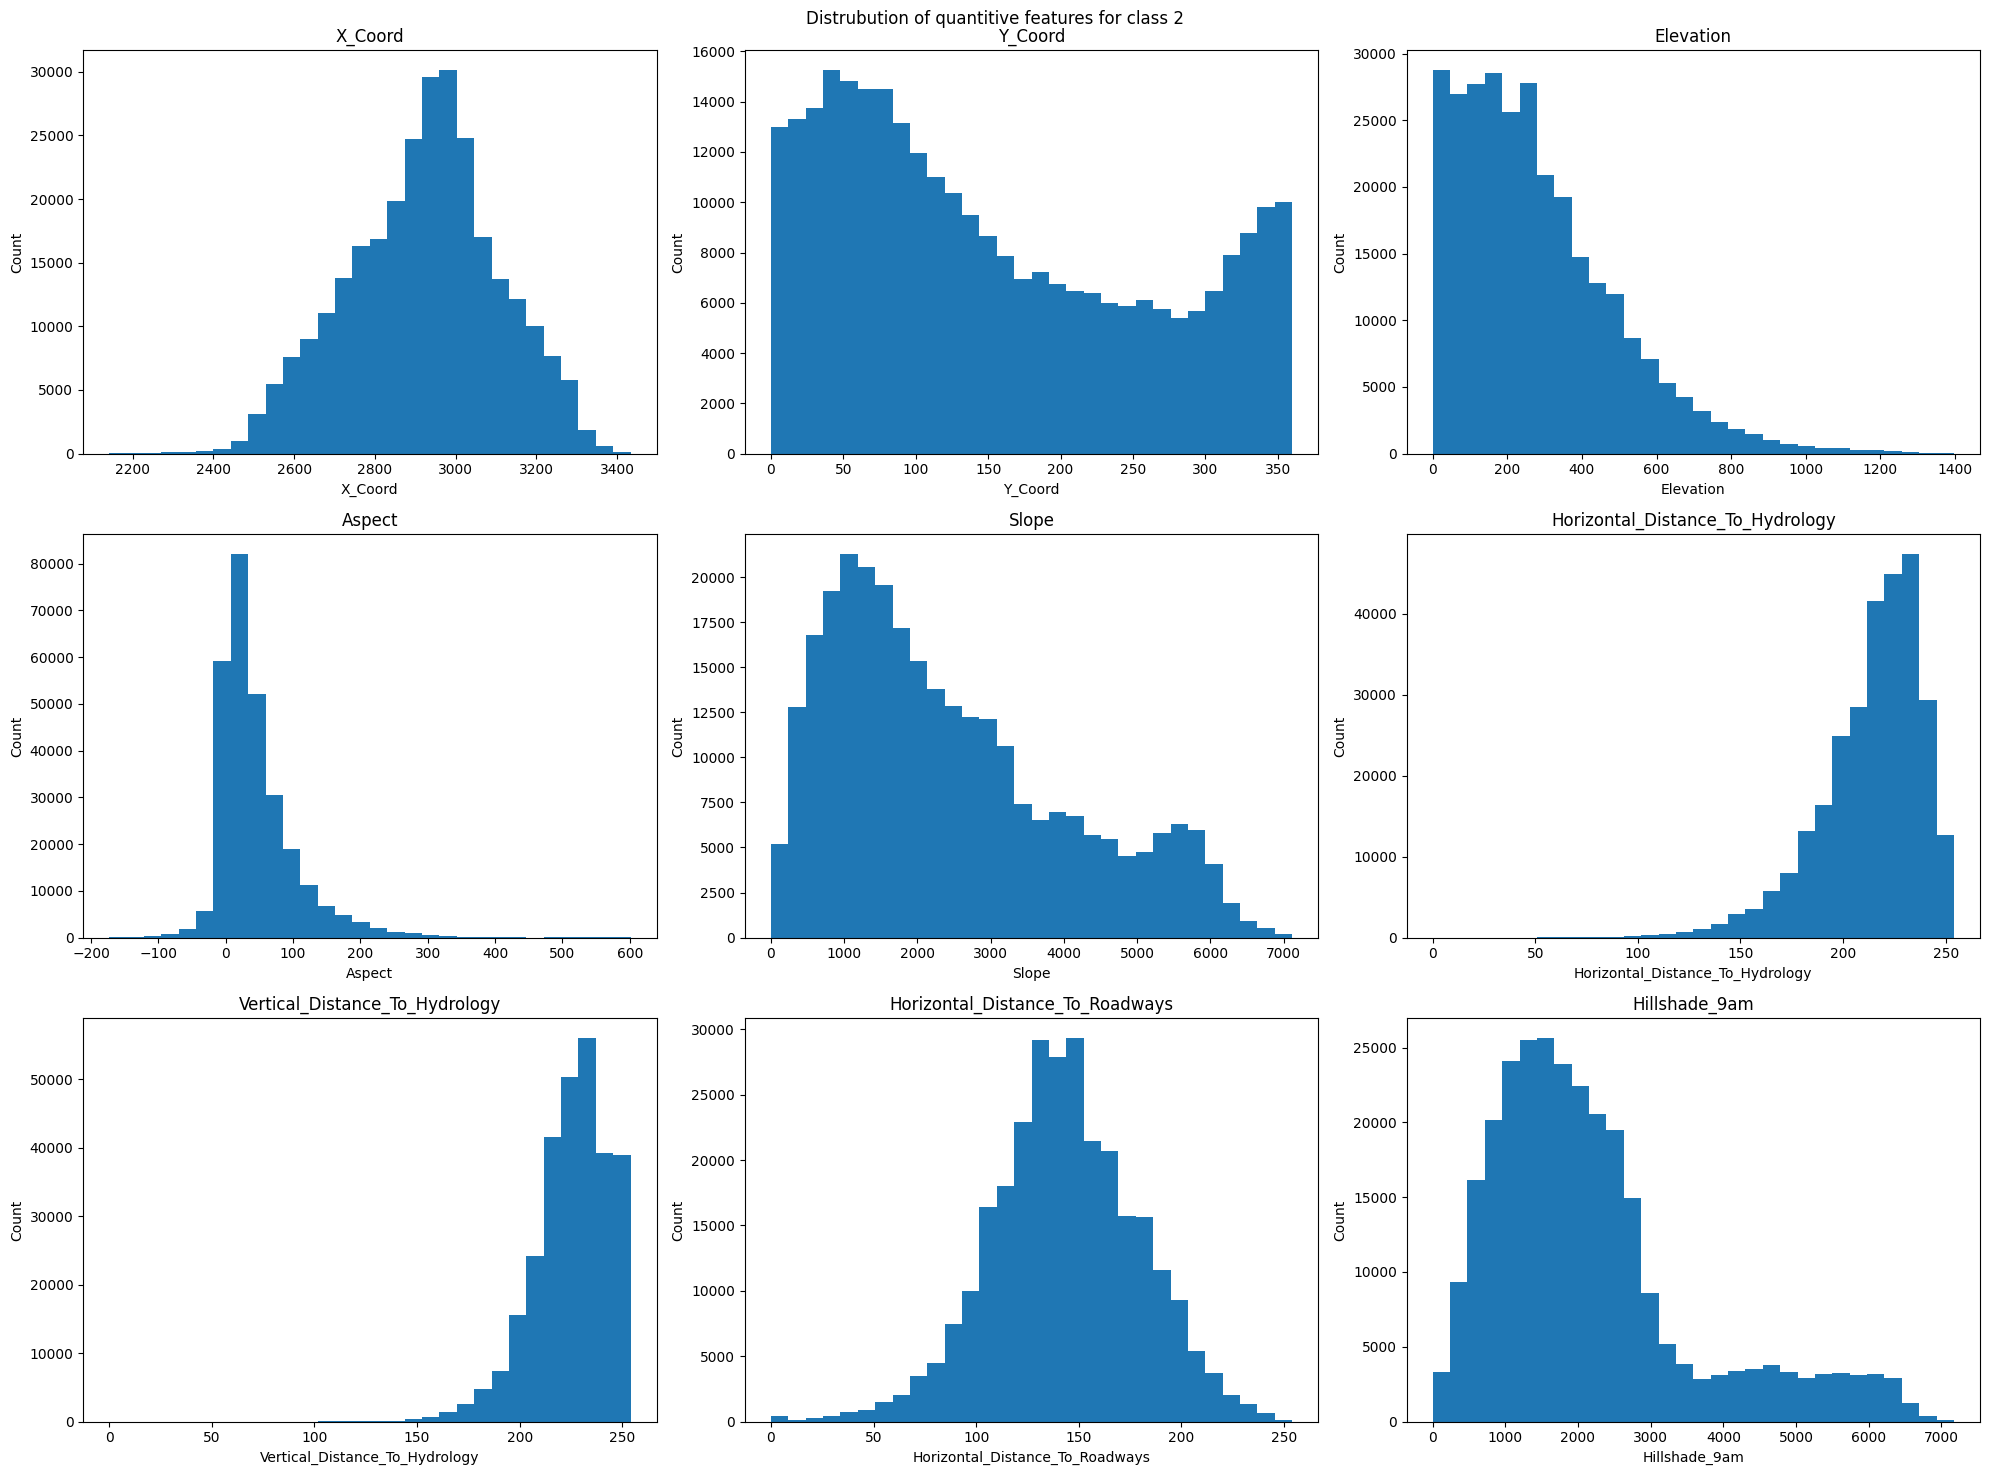

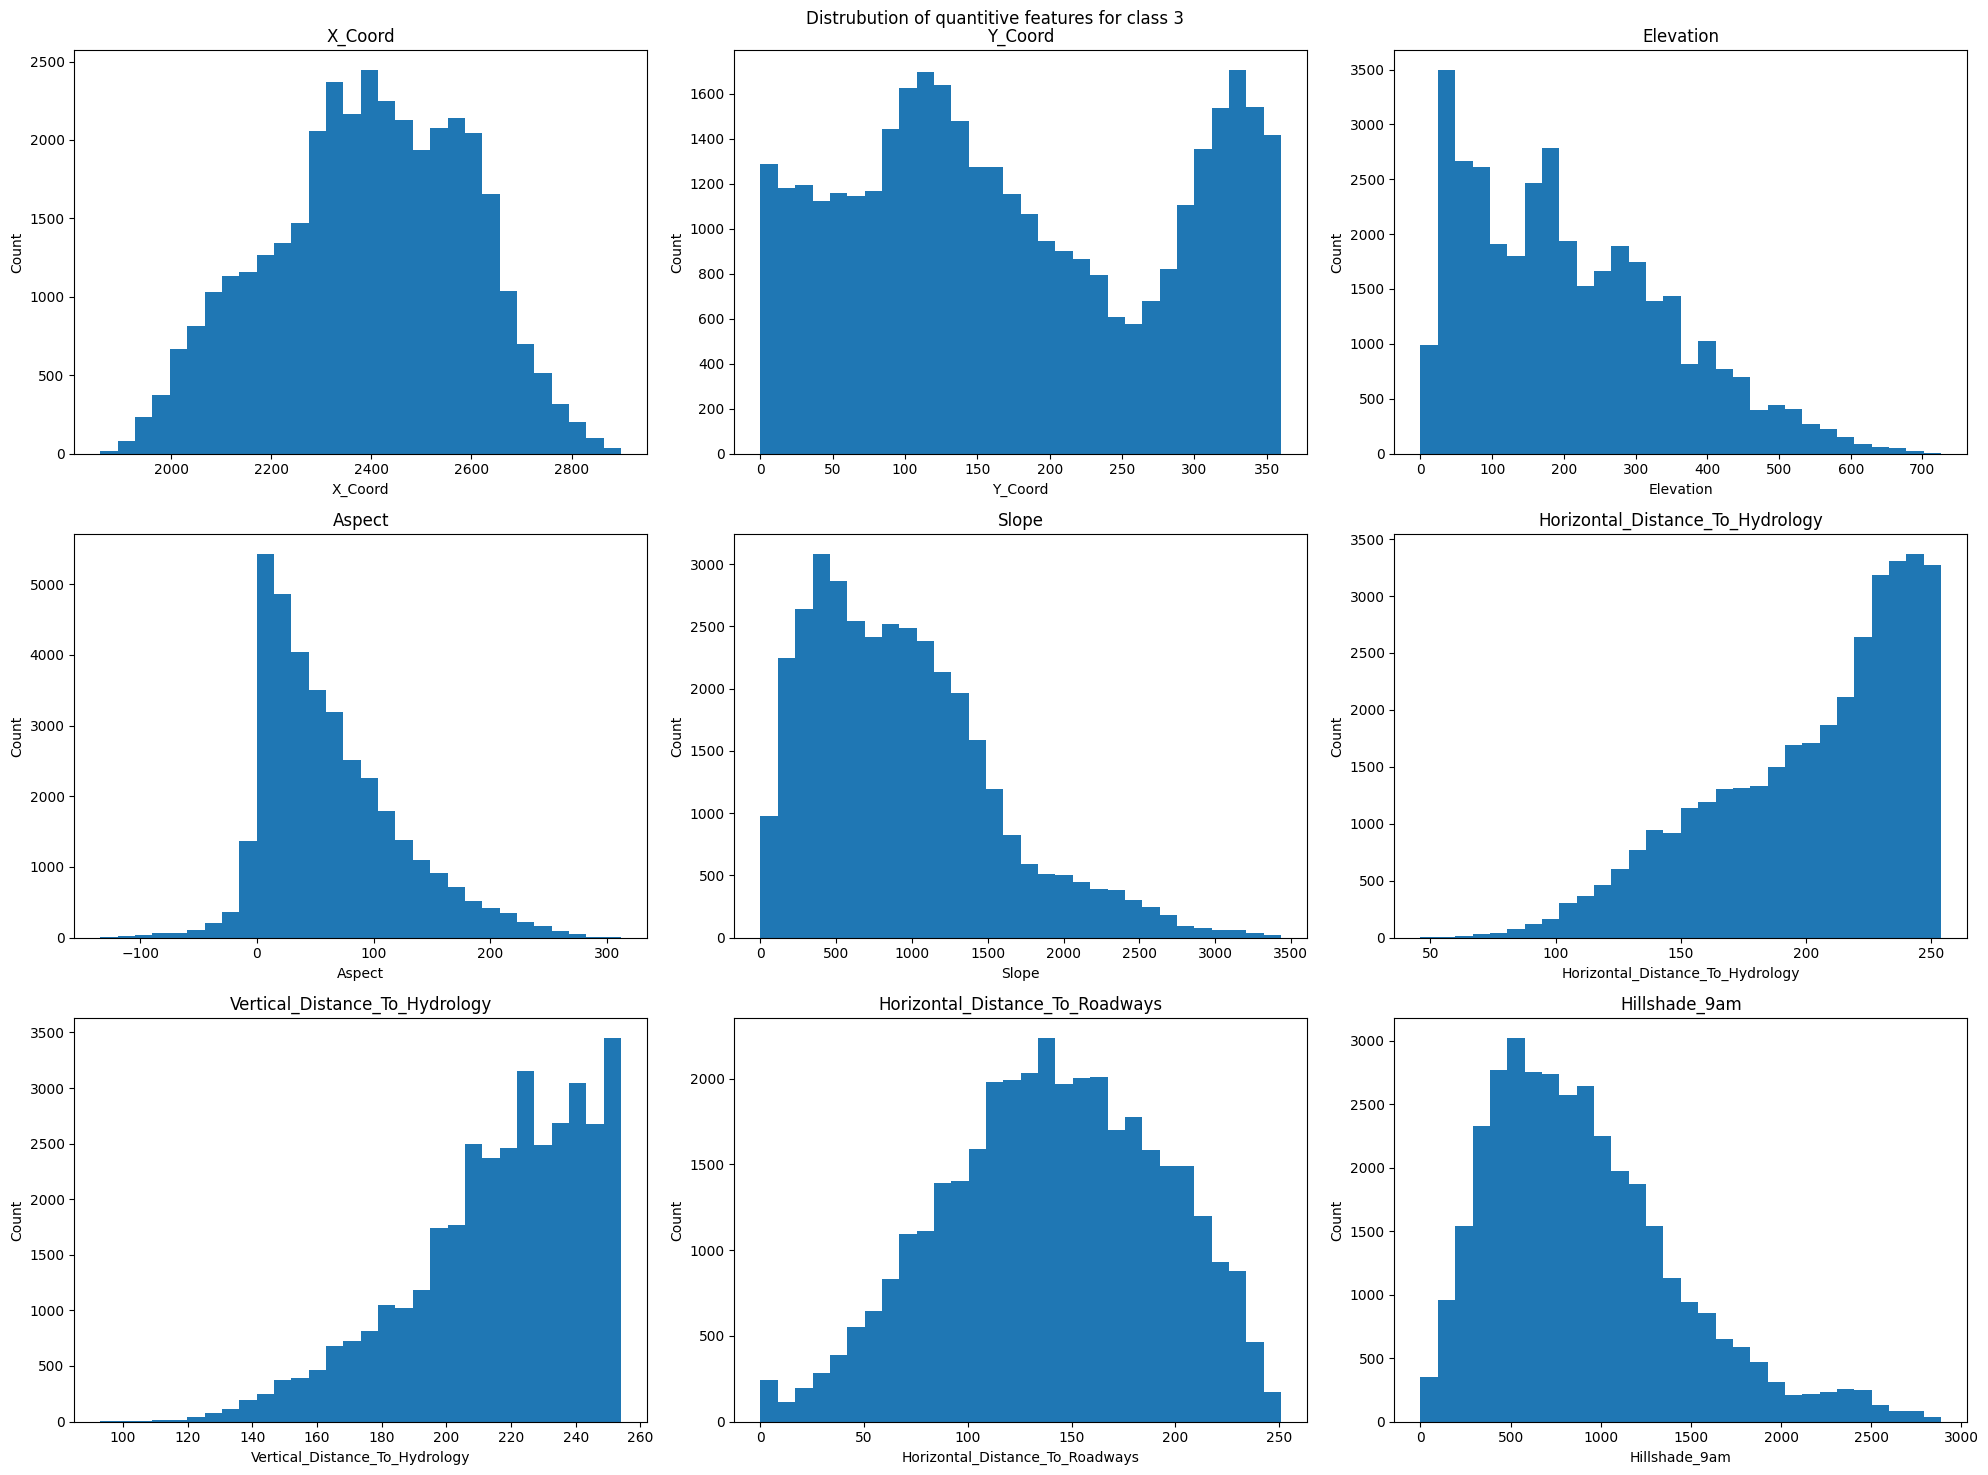

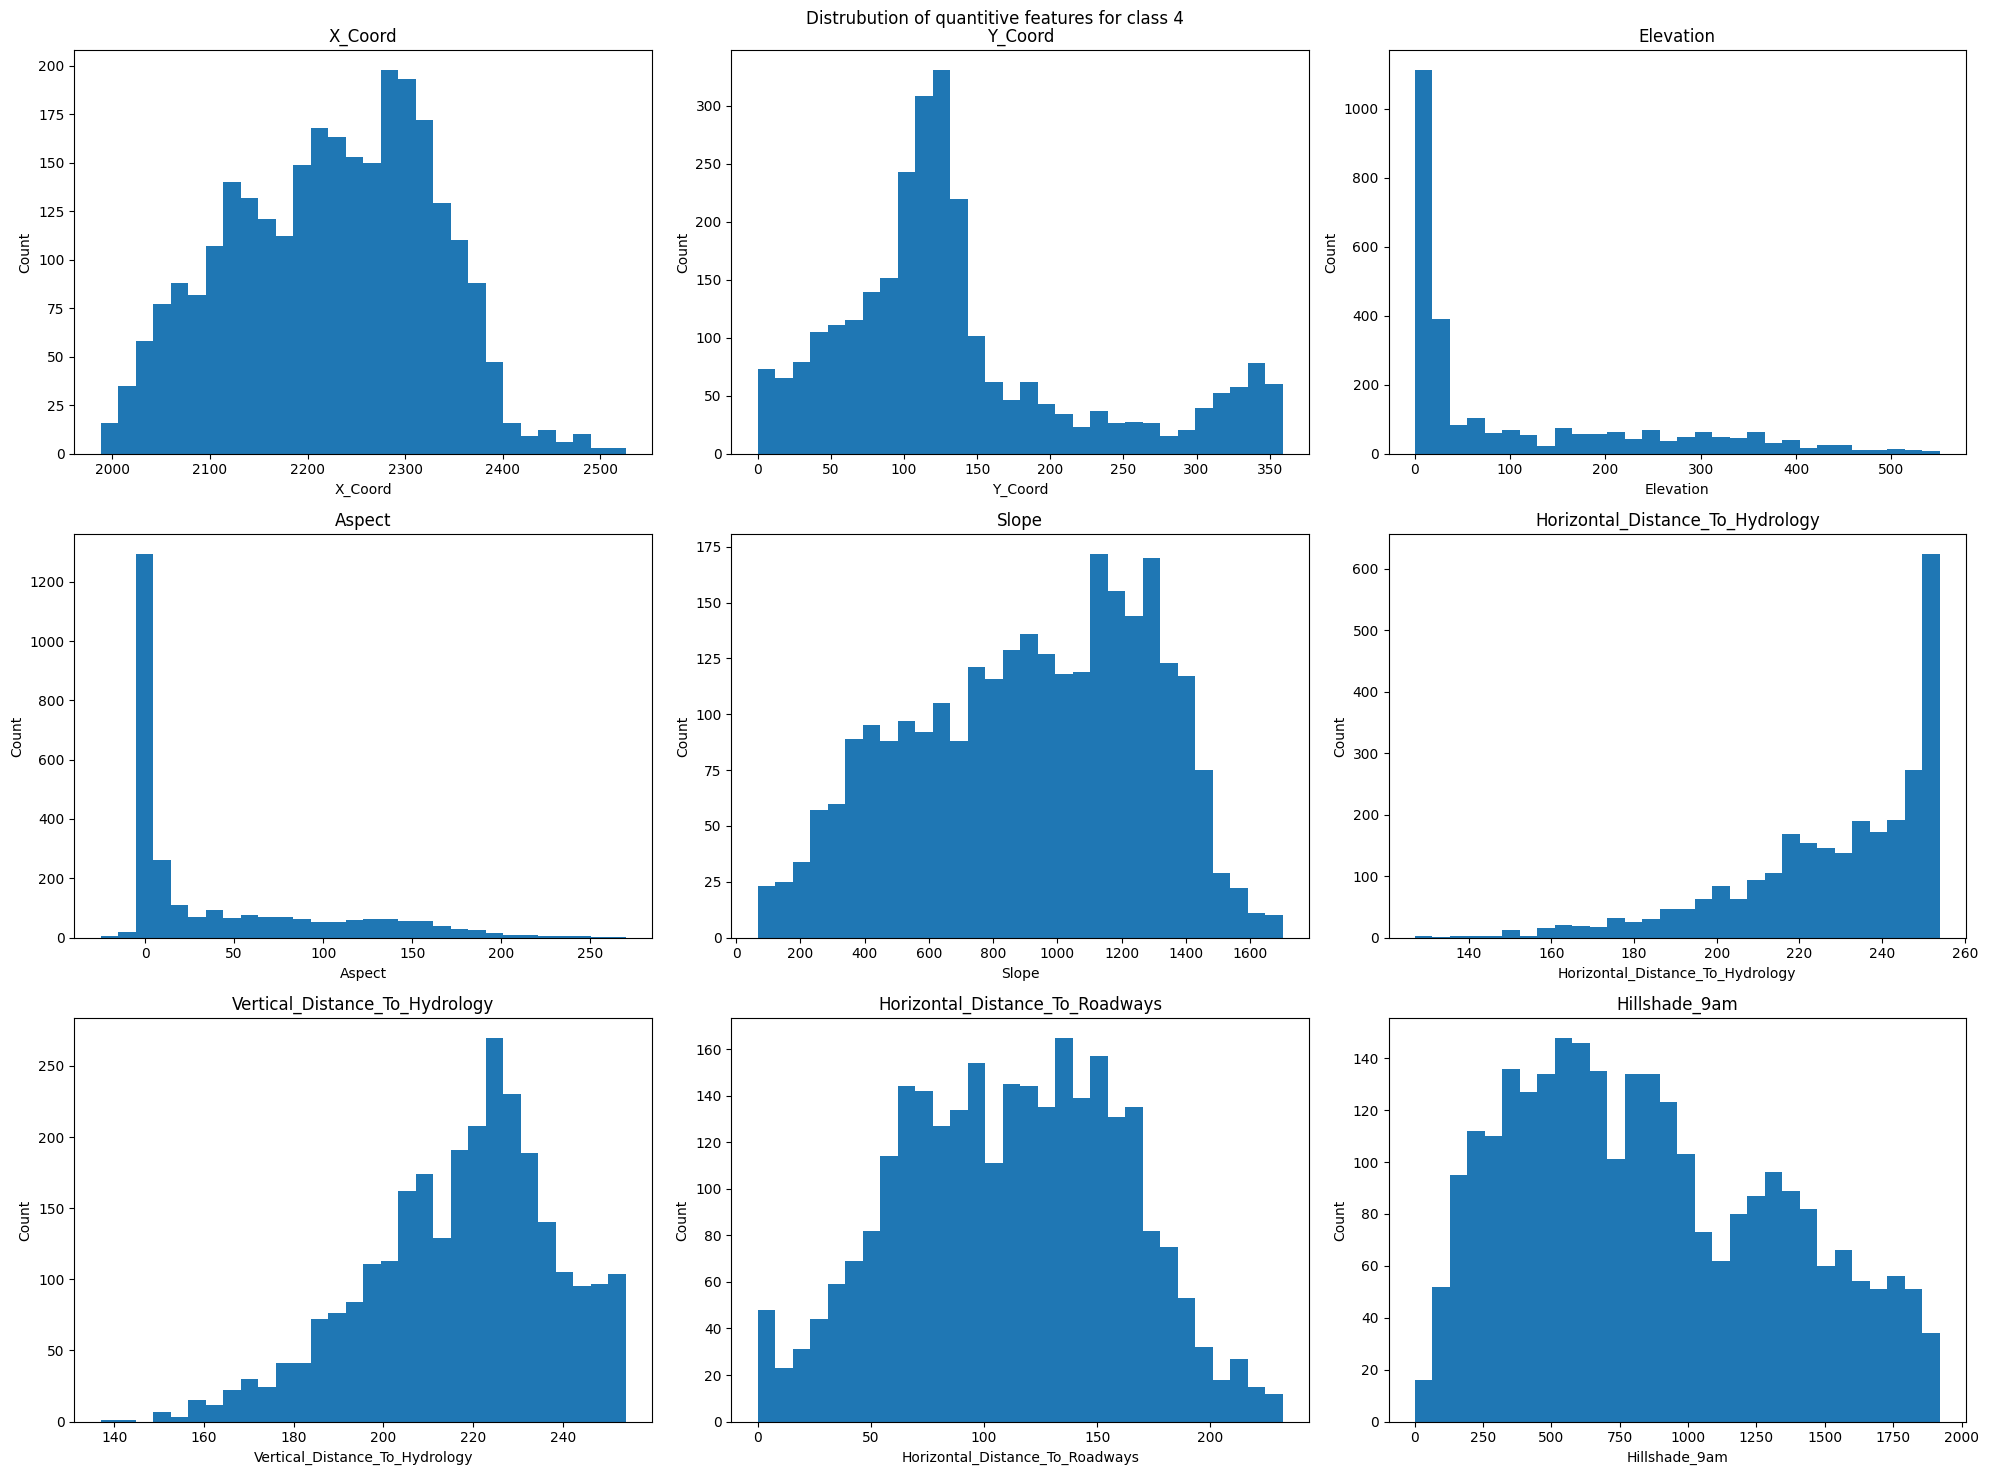

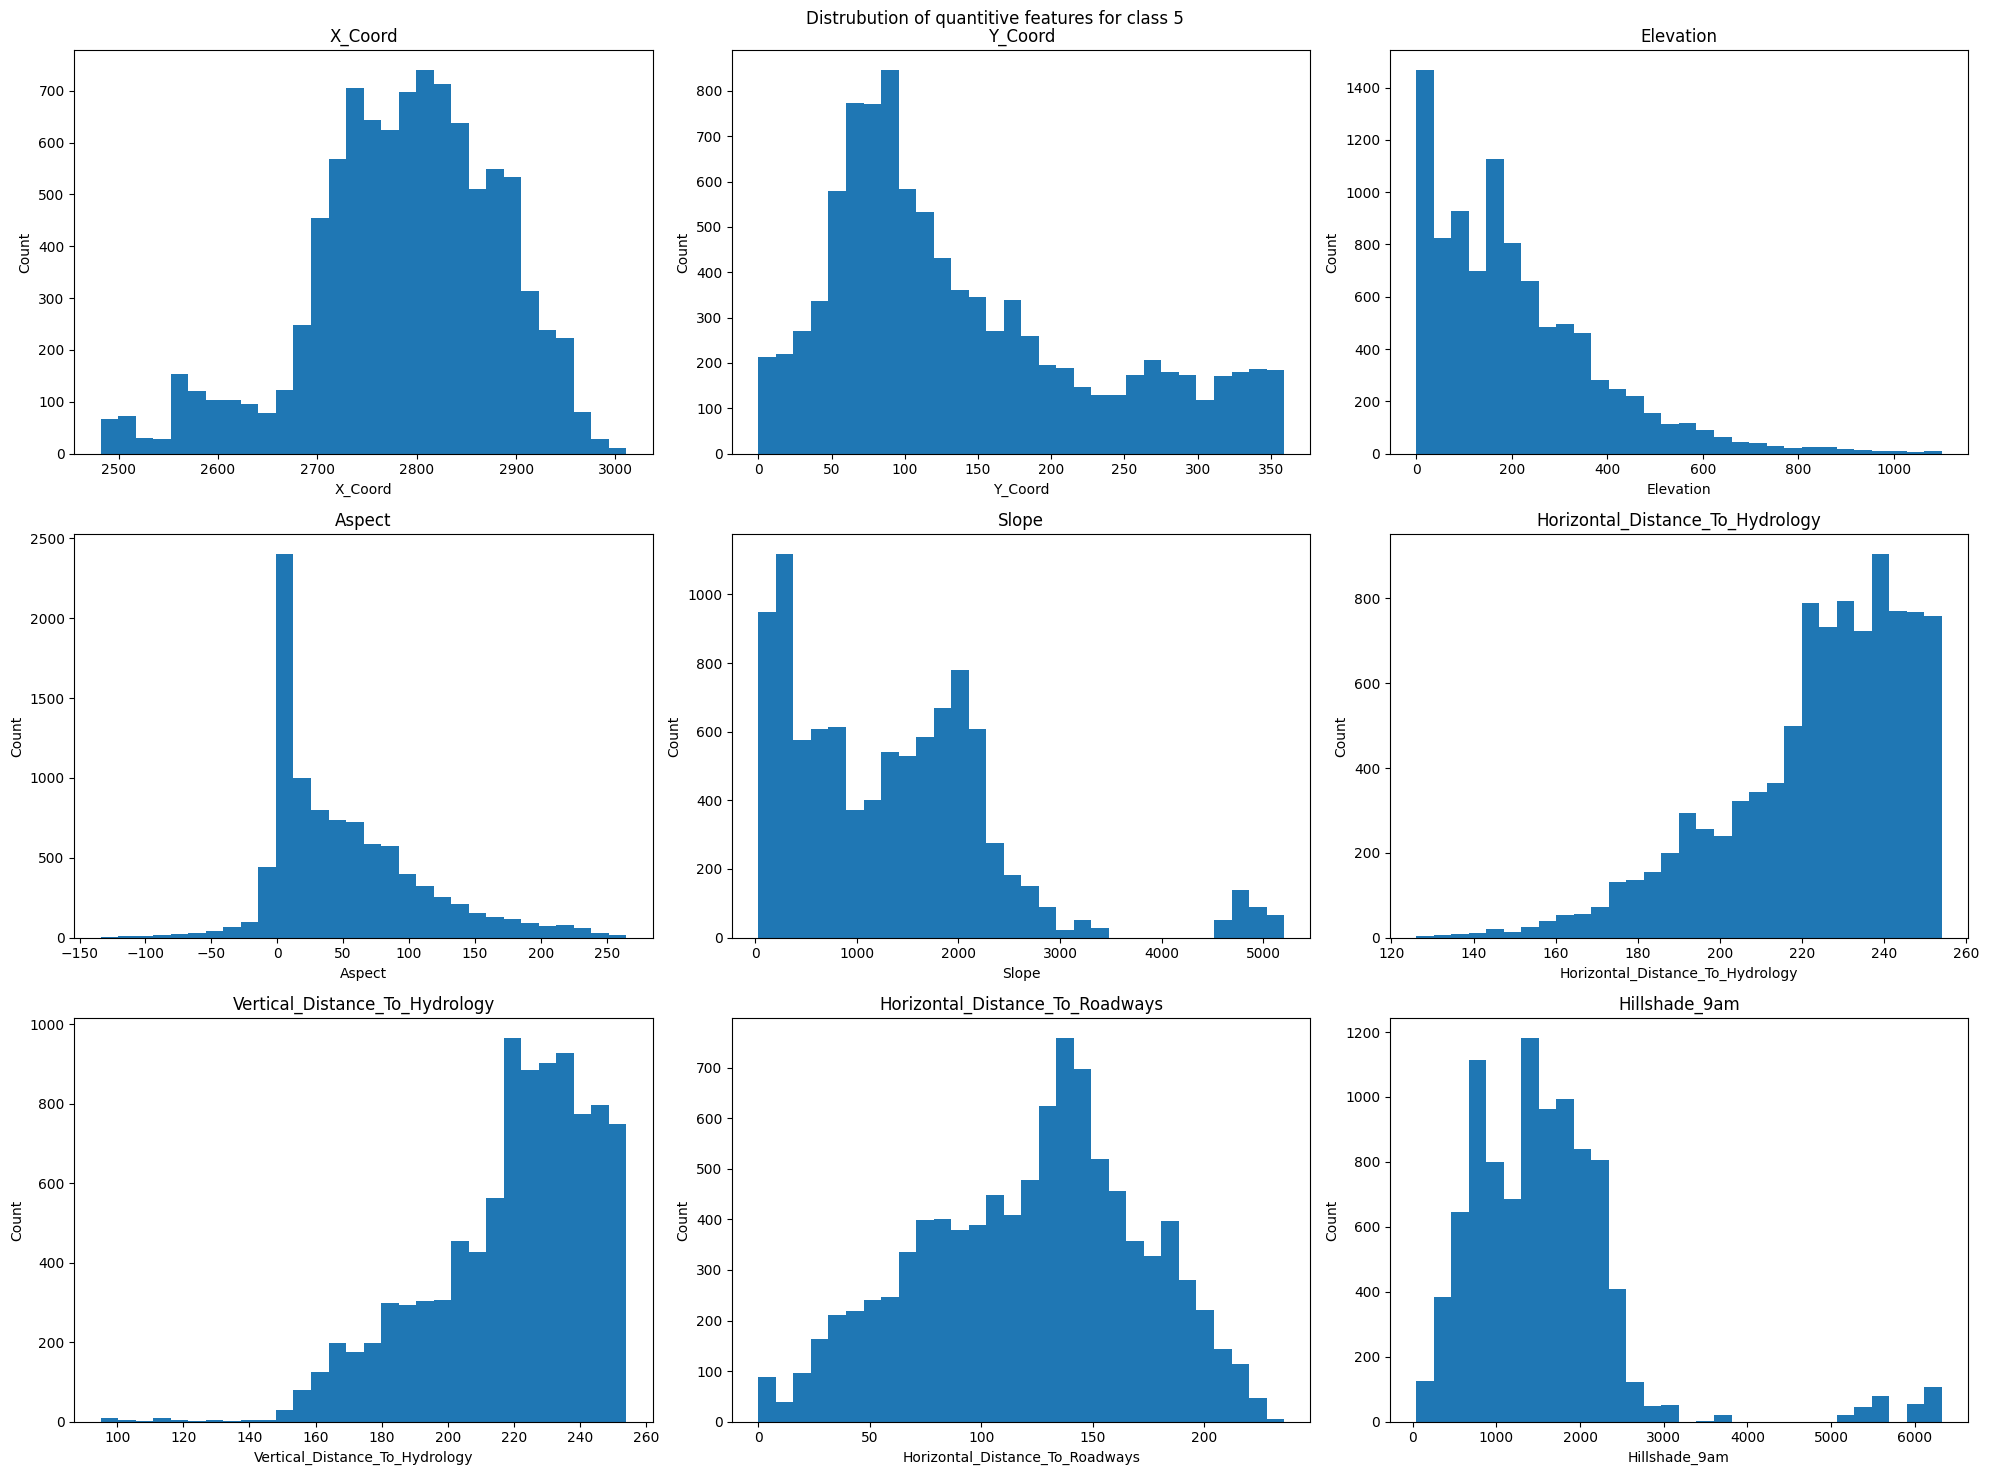

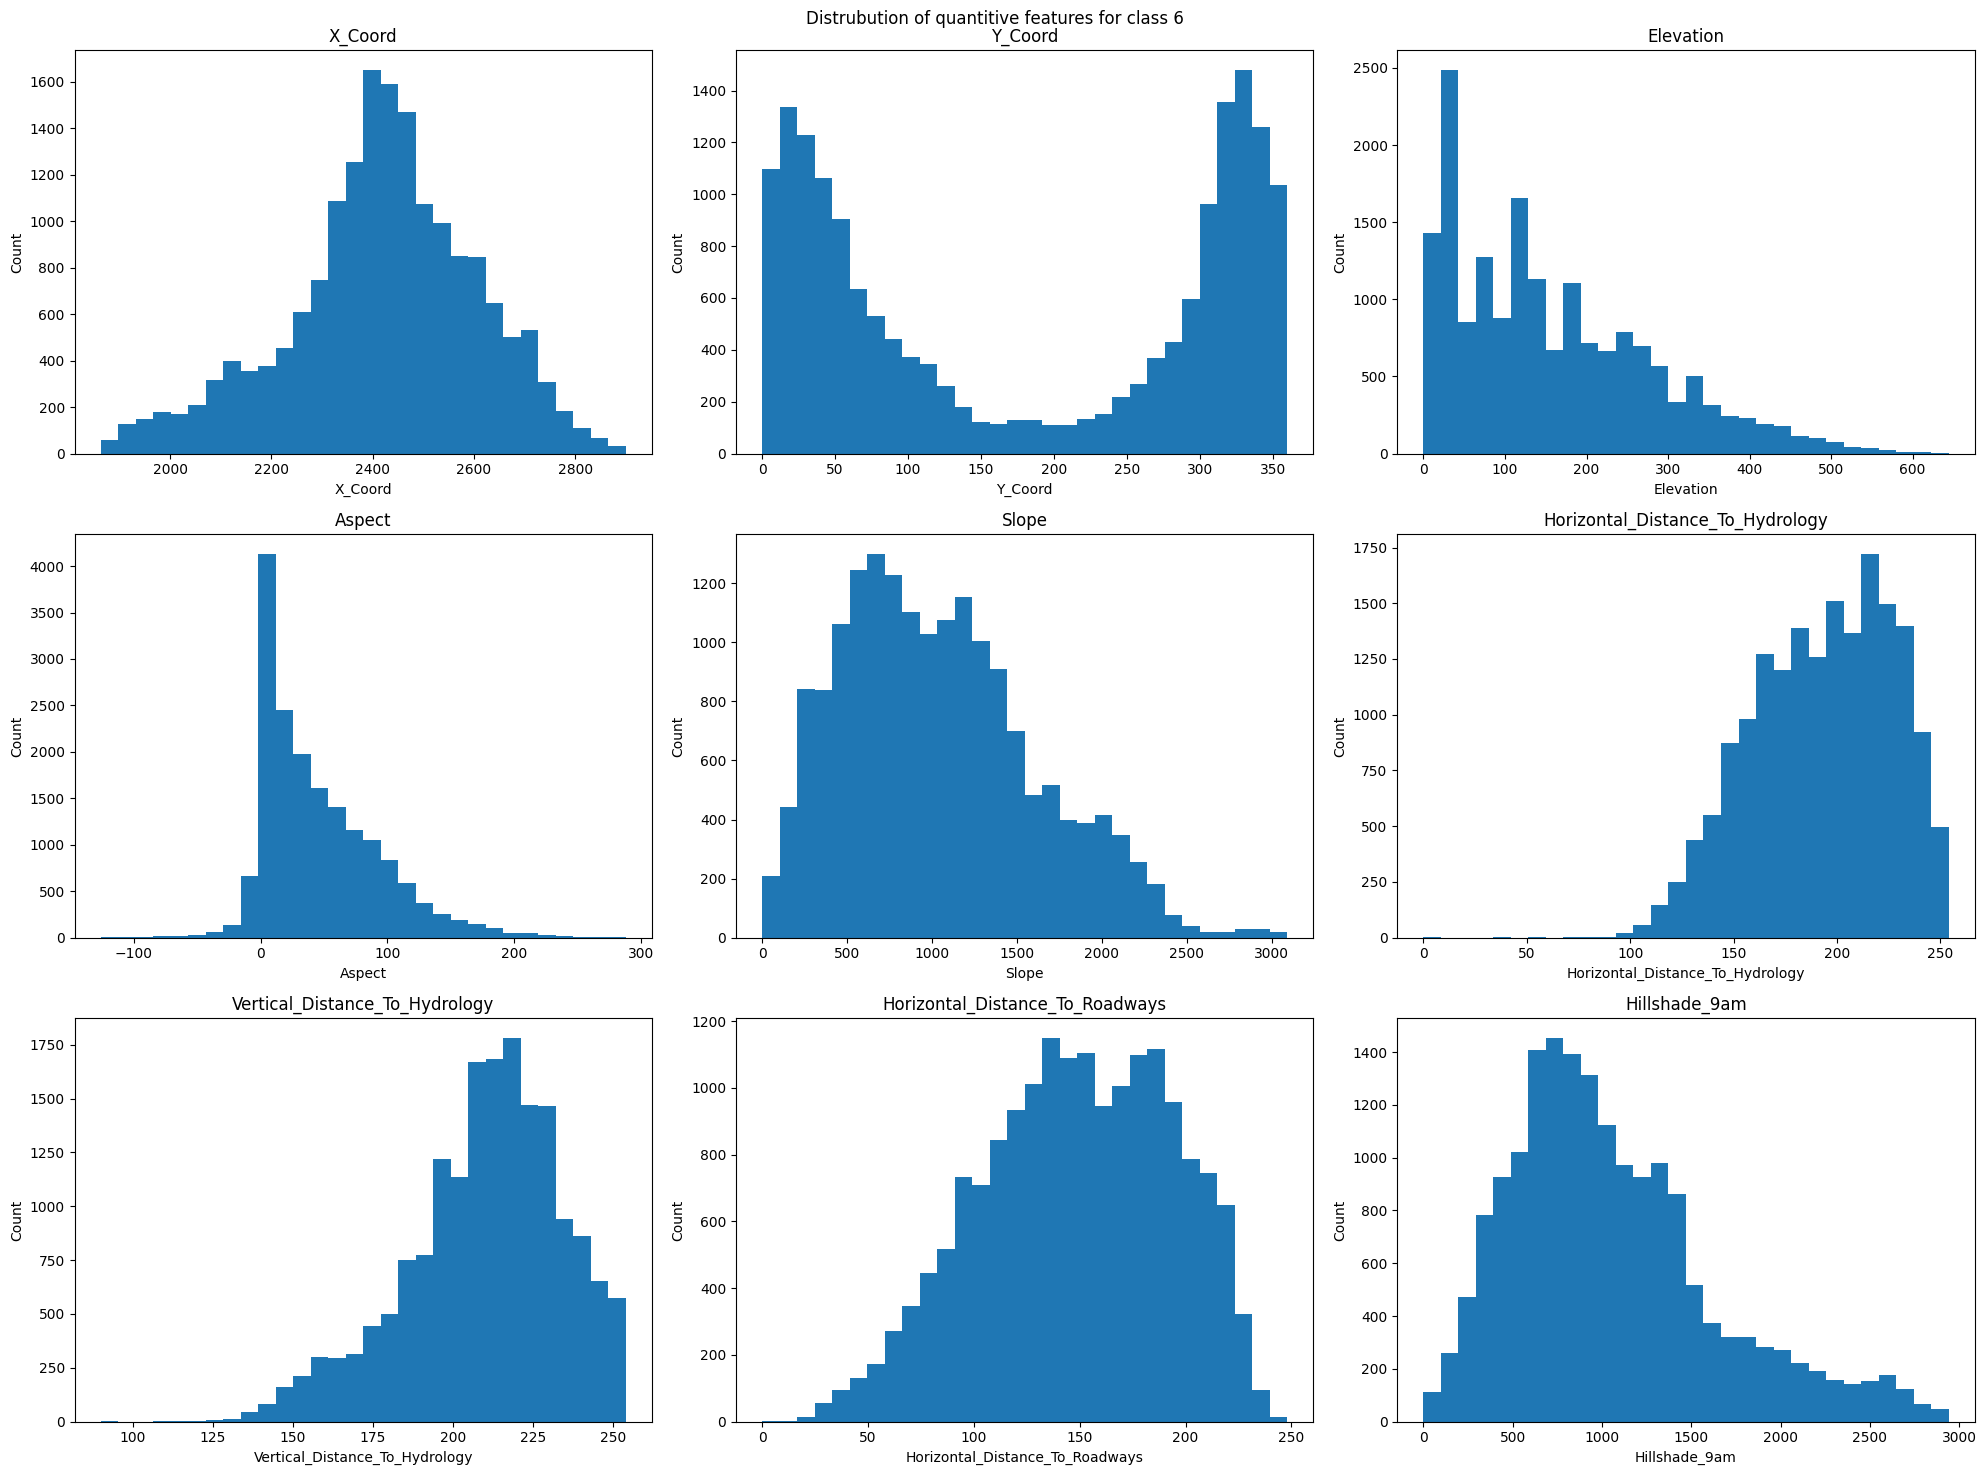

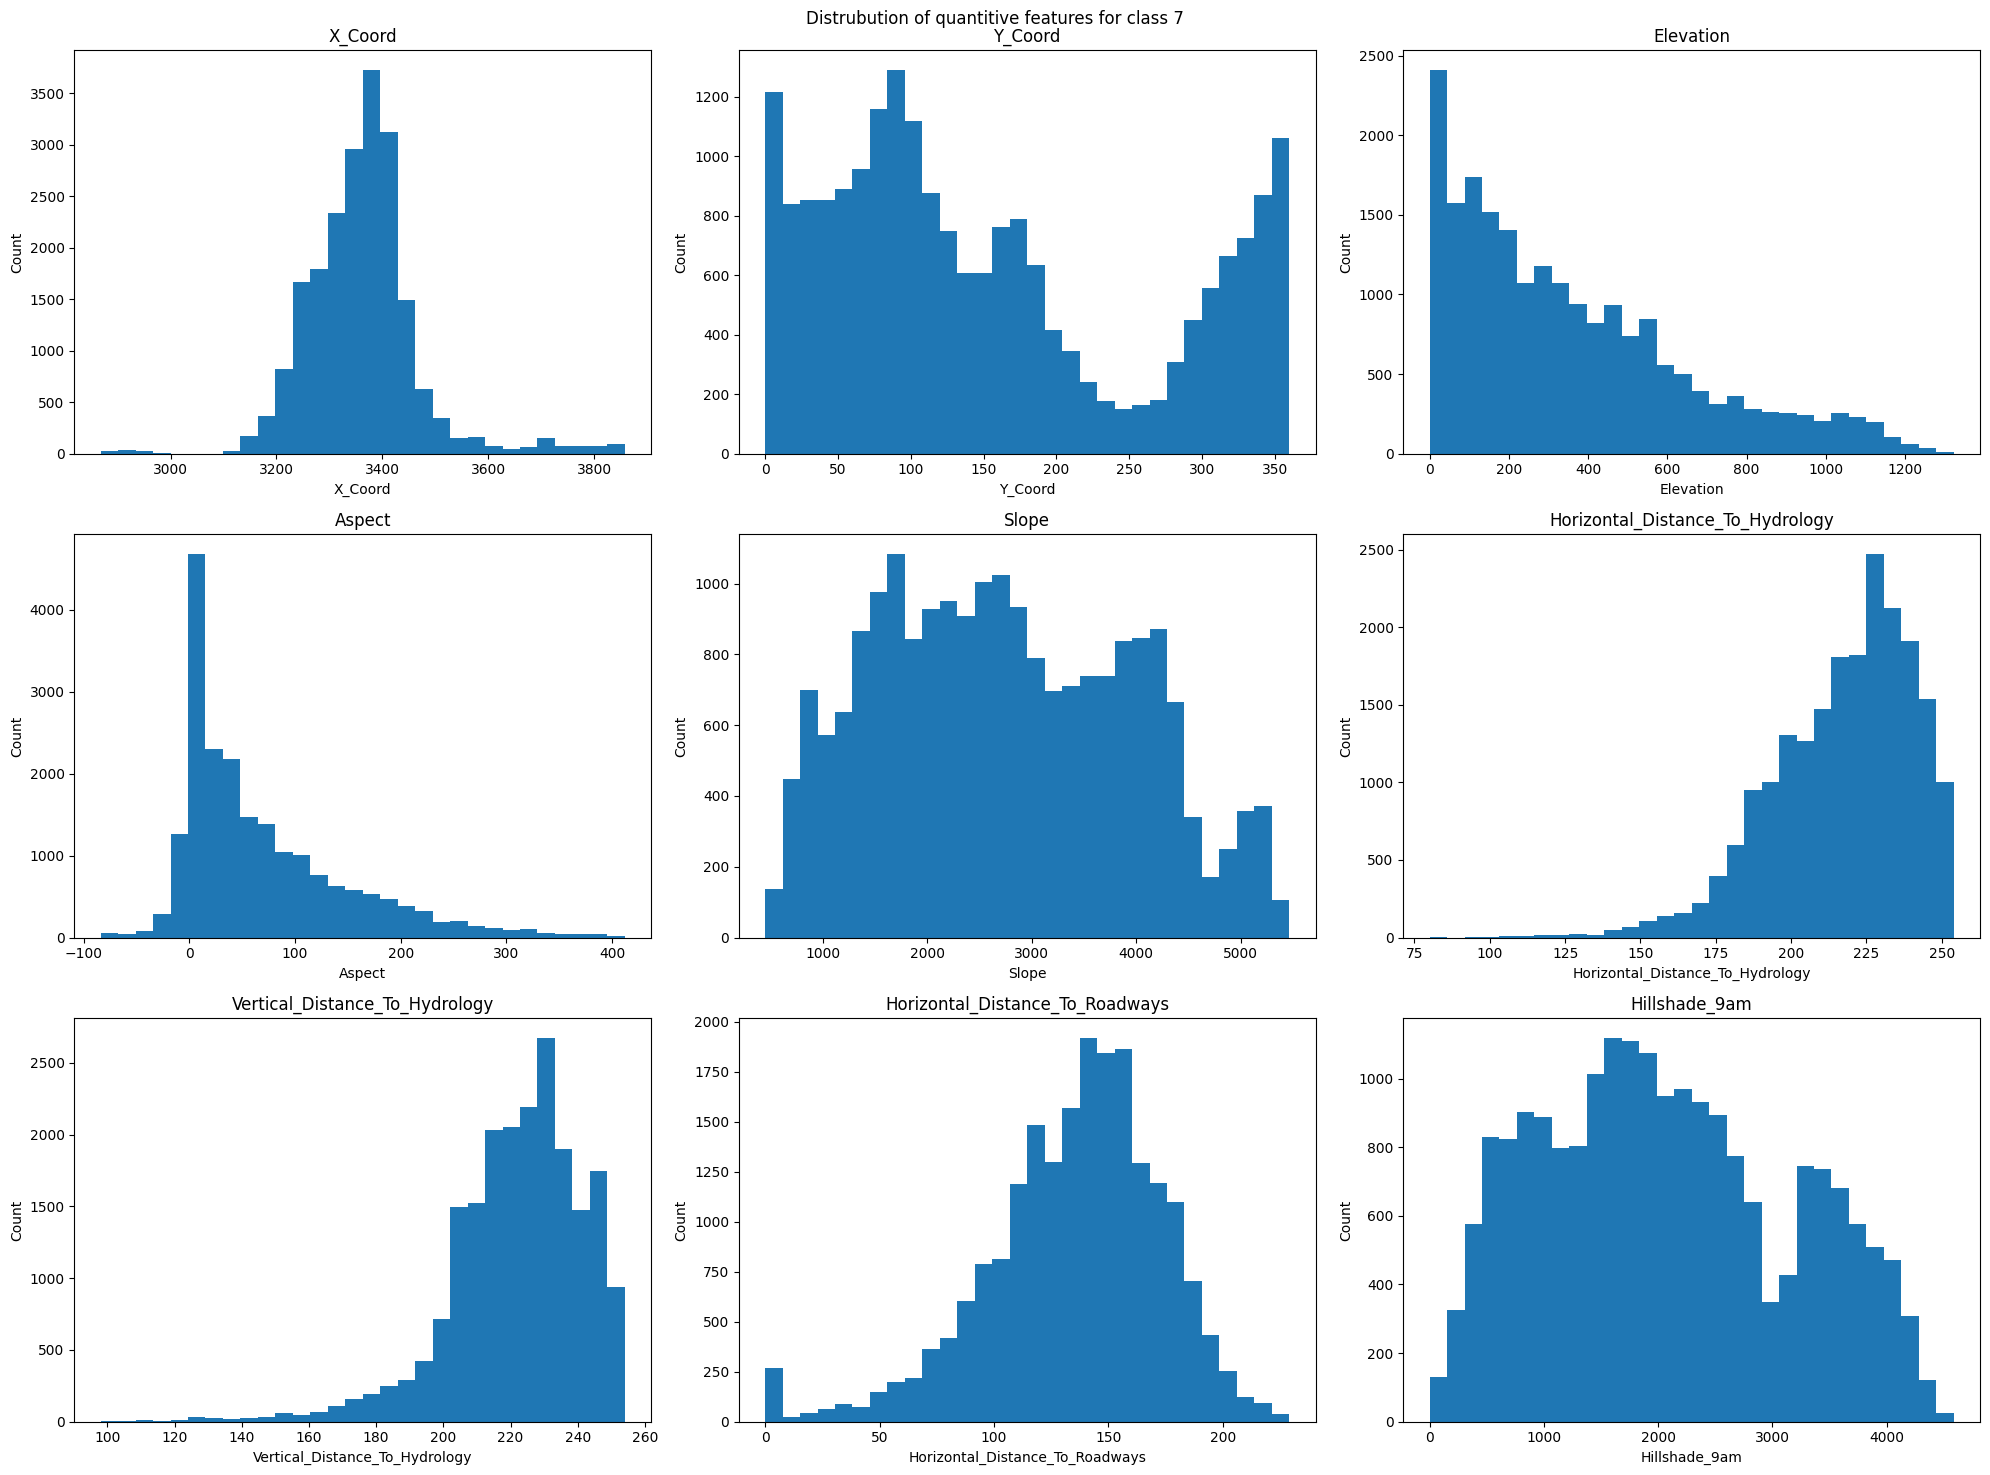

In [ ]:
#quantitive features distribution
for k in range(7):
  fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))
  axes = axes.flatten()
  for i, feature in enumerate(features):
      axes[i].hist(df[df['Cover_Type']== k+1][feature], bins=30)
      axes[i].set_title(feature)
      axes[i].set_xlabel(feature)
      axes[i].set_ylabel('Count')

  plt.suptitle(f"Distrubution of quantitive features for class {k+1}")
  plt.tight_layout()  # adjusts spacing so titles/labels don't overlap
  plt.show()


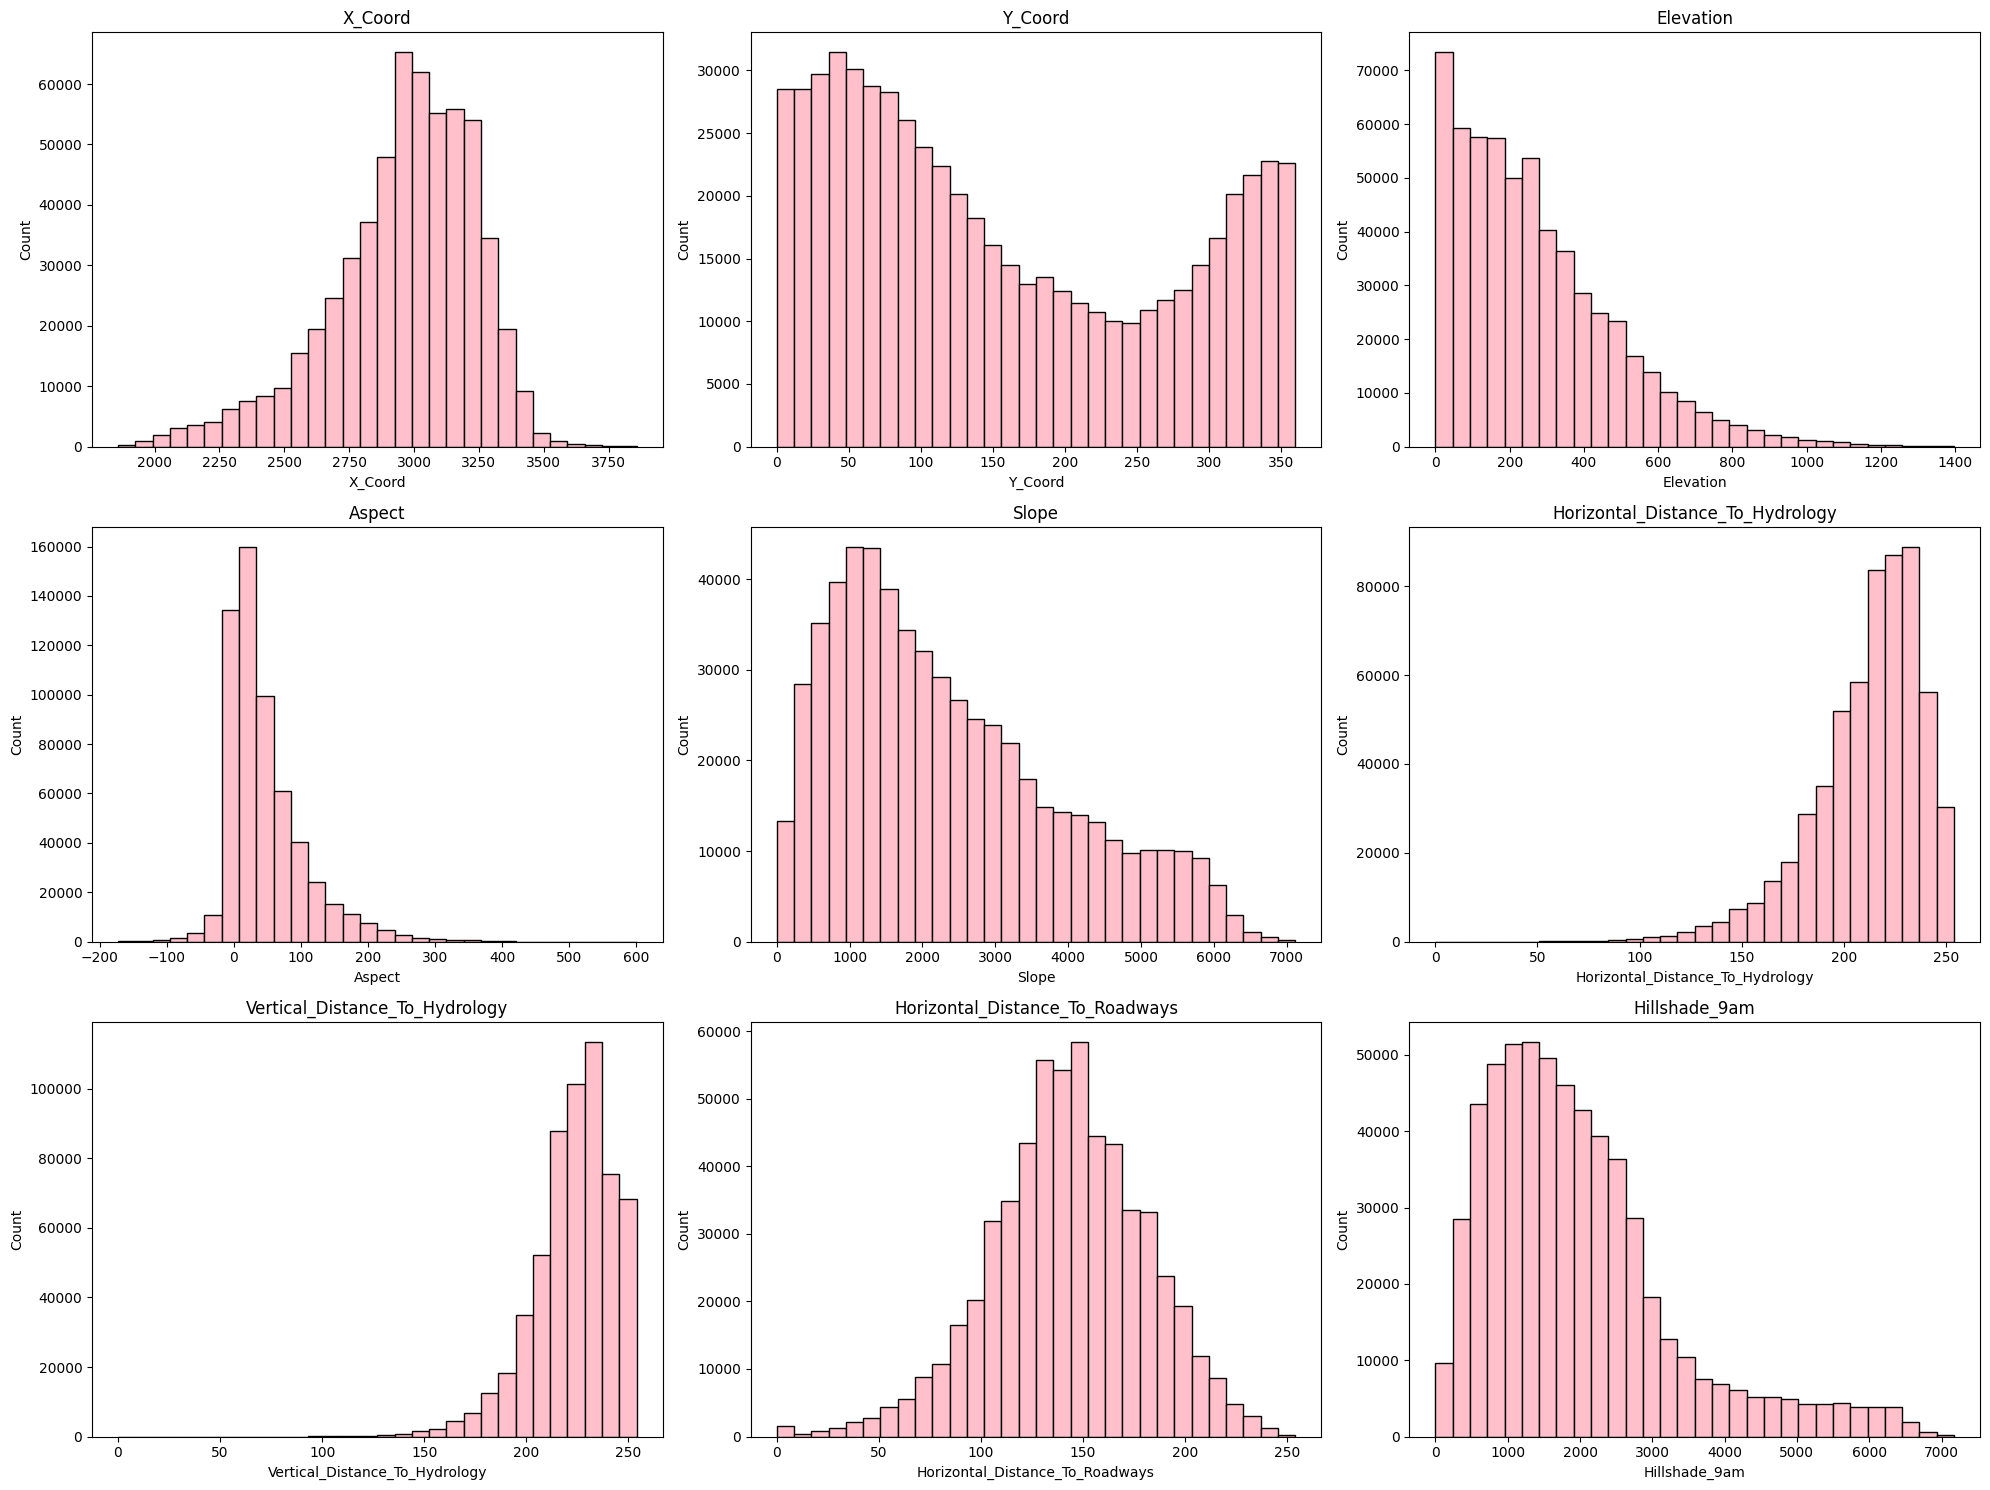

In [ ]:
# global distribution of numeric features
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))
axes = axes.flatten()
for i, feature in enumerate(features):
    axes[i].hist(df[feature], bins=30, color='pink', edgecolor='black')
    axes[i].set_title(feature)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()


**detecting outliers**

In [ ]:
from scipy import stats
for feat in features:
  z_scores = np.abs(stats.zscore(df[feat]))
  outliers = df[z_scores > 3][feat]
  print(f"Outliers count for {feat}: ",len(outliers))

Outliers count for X_Coord:  5832
Outliers count for Y_Coord:  0
Outliers count for Elevation:  7073
Outliers count for Aspect:  10059
Outliers count for Slope:  33
Outliers count for Horizontal_Distance_To_Hydrology:  7516
Outliers count for Vertical_Distance_To_Hydrology:  7082
Outliers count for Horizontal_Distance_To_Roadways:  3042
Outliers count for Hillshade_9am:  10853


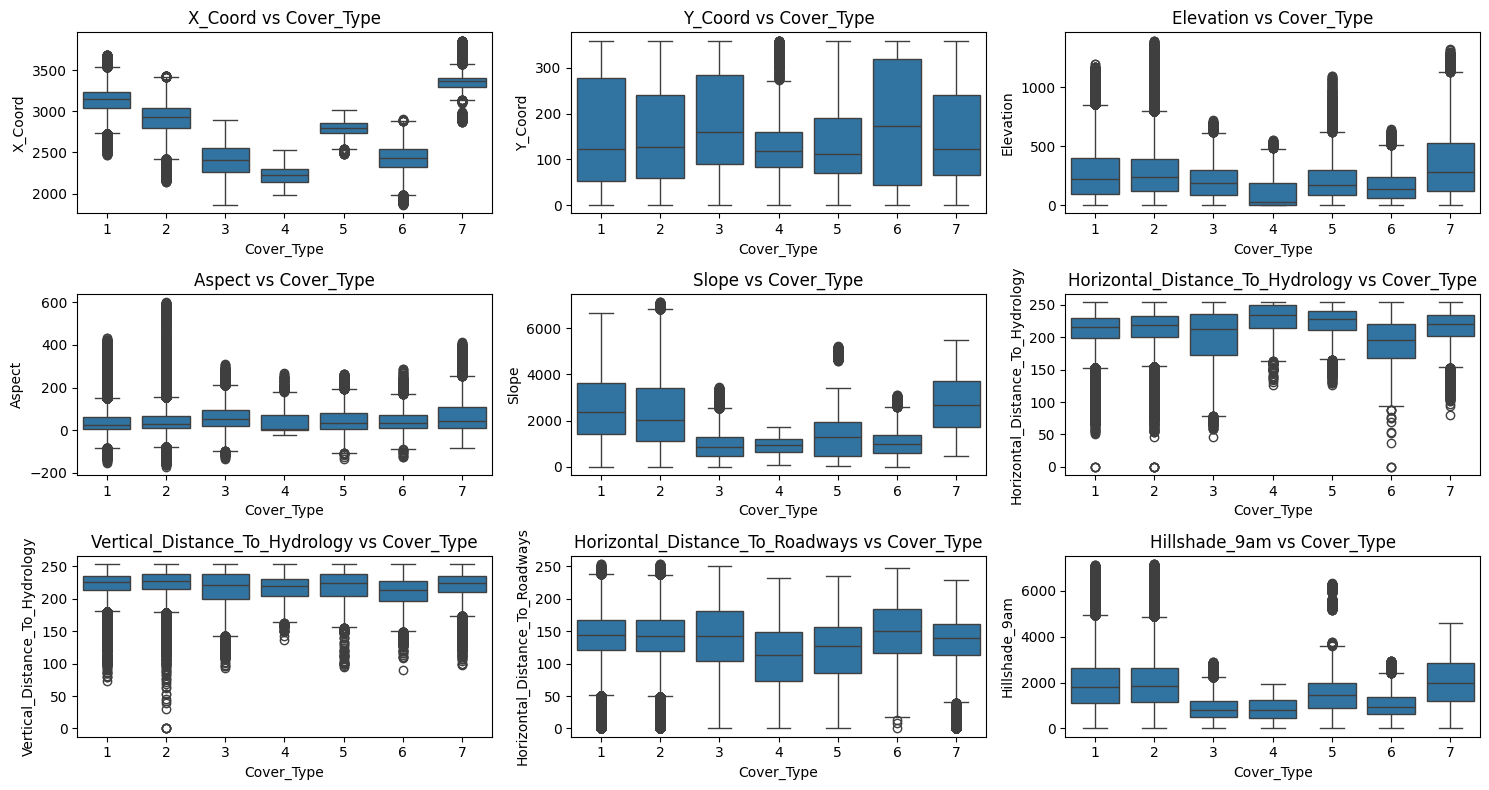

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 8))
axes = axes.flatten()

for i, feat in enumerate(features):
    sns.boxplot(x='Cover_Type', y=feat, data=df, ax=axes[i])
    axes[i].set_title(f"{feat} vs Cover_Type")

plt.tight_layout()
plt.show()



**relation between numeric features**

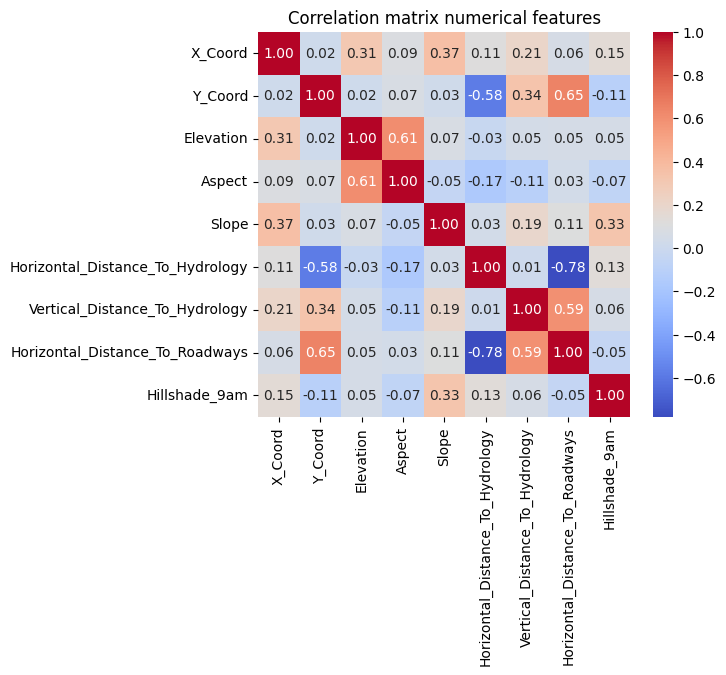

In [ ]:
#corrleation matrix between numerical features
corr_matrix = df[features].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation matrix numerical features")
plt.show()


## Initial constats
  - elevation ,slope , Horizontal_Distance_To_Roadways are best at seperating classes
  - too many outliers in all features X classes : better not to impute
  - Elevation is always low for class 4 and more dispersed in class 2 and 1
  - horizontal and vertical distance to hydrolics are similar in shape and close in values ( correlation indicators )
  - Correlation is moderate to low , no need to drop a feature
  - Elevation , slope and aspect have long right tails
  - vertical and horizontal distance to hydrology are left skewed



## categorical features analysis

In [ ]:
#identify binary columns and non binary
for col in categorical_features:
    print(f"{col}: {df[col].nunique()} unique values")

Hillshade_Noon: 2 unique values
Hillshade_3pm: 2 unique values
Wilderness_Area: 2 unique values
Horizontal_Distance_To_Fire_Points: 2 unique values
Region_ID: 67 unique values
Soil_Type1: 2 unique values
Soil_Type2: 2 unique values
Soil_Type3: 2 unique values
Soil_Type4: 2 unique values
Soil_Type5: 2 unique values
Soil_Type6: 2 unique values
Soil_Type7: 2 unique values
Soil_Type8: 2 unique values
Soil_Type9: 2 unique values
Soil_Type10: 2 unique values
Soil_Type11: 2 unique values
Soil_Type12: 2 unique values
Soil_Type13: 2 unique values
Soil_Type14: 2 unique values
Soil_Type15: 2 unique values
Soil_Type16: 2 unique values
Soil_Type17: 2 unique values
Soil_Type18: 2 unique values
Soil_Type19: 2 unique values
Soil_Type20: 2 unique values
Soil_Type21: 2 unique values
Soil_Type22: 2 unique values
Soil_Type23: 2 unique values
Soil_Type24: 2 unique values
Soil_Type25: 2 unique values
Soil_Type26: 2 unique values
Soil_Type27: 2 unique values
Soil_Type28: 2 unique values
Soil_Type29: 2 unique

In [ ]:
# binary features aside from soil type one-hot
cat_features = ['Hillshade_Noon','Hillshade_3pm','Wilderness_Area',
                'Horizontal_Distance_To_Fire_Points']
#check for class imbalances and decide which columns to drop (rare presence)
for col in cat_features:
    print(f"{col} distribution (%):")
    counts = df[col].value_counts(normalize=True) * 100
    print(counts.round(2))
    print()

Hillshade_Noon distribution (%):
Hillshade_Noon
0    55.11
1    44.89
Name: proportion, dtype: float64

Hillshade_3pm distribution (%):
Hillshade_3pm
0    94.86
1     5.14
Name: proportion, dtype: float64

Wilderness_Area distribution (%):
Wilderness_Area
0    93.64
1     6.36
Name: proportion, dtype: float64

Horizontal_Distance_To_Fire_Points distribution (%):
Horizontal_Distance_To_Fire_Points
0    56.39
1    43.61
Name: proportion, dtype: float64



- Hillshade_3pm and Wilderness_Area are highly imbalanced , around 6% of rows are = 1
- might not be very informative (worth dropping ?)

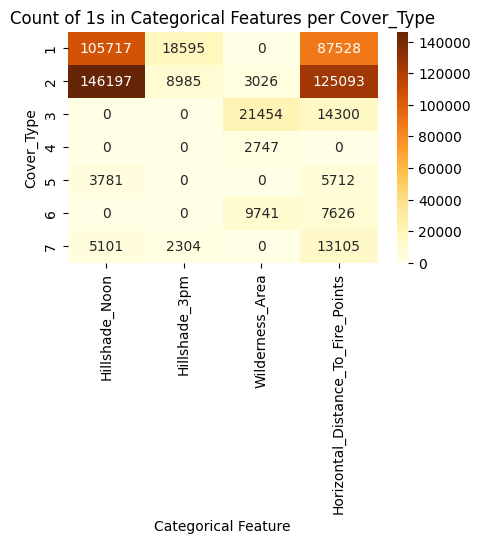

In [ ]:
plot_data = pd.DataFrame(index=sorted(df['Cover_Type'].unique()), columns=cat_features)

for feature in cat_features:
    plot_data[feature] = df.groupby('Cover_Type')[feature].sum()
plot_data = plot_data.astype(int)

plt.figure(figsize=(5,3))
sns.heatmap(plot_data, annot=True, fmt="d", cmap='YlOrBr')
plt.title('Count of 1s in Categorical Features per Cover_Type')
plt.xlabel('Categorical Feature')
plt.ylabel('Cover_Type')
plt.show()

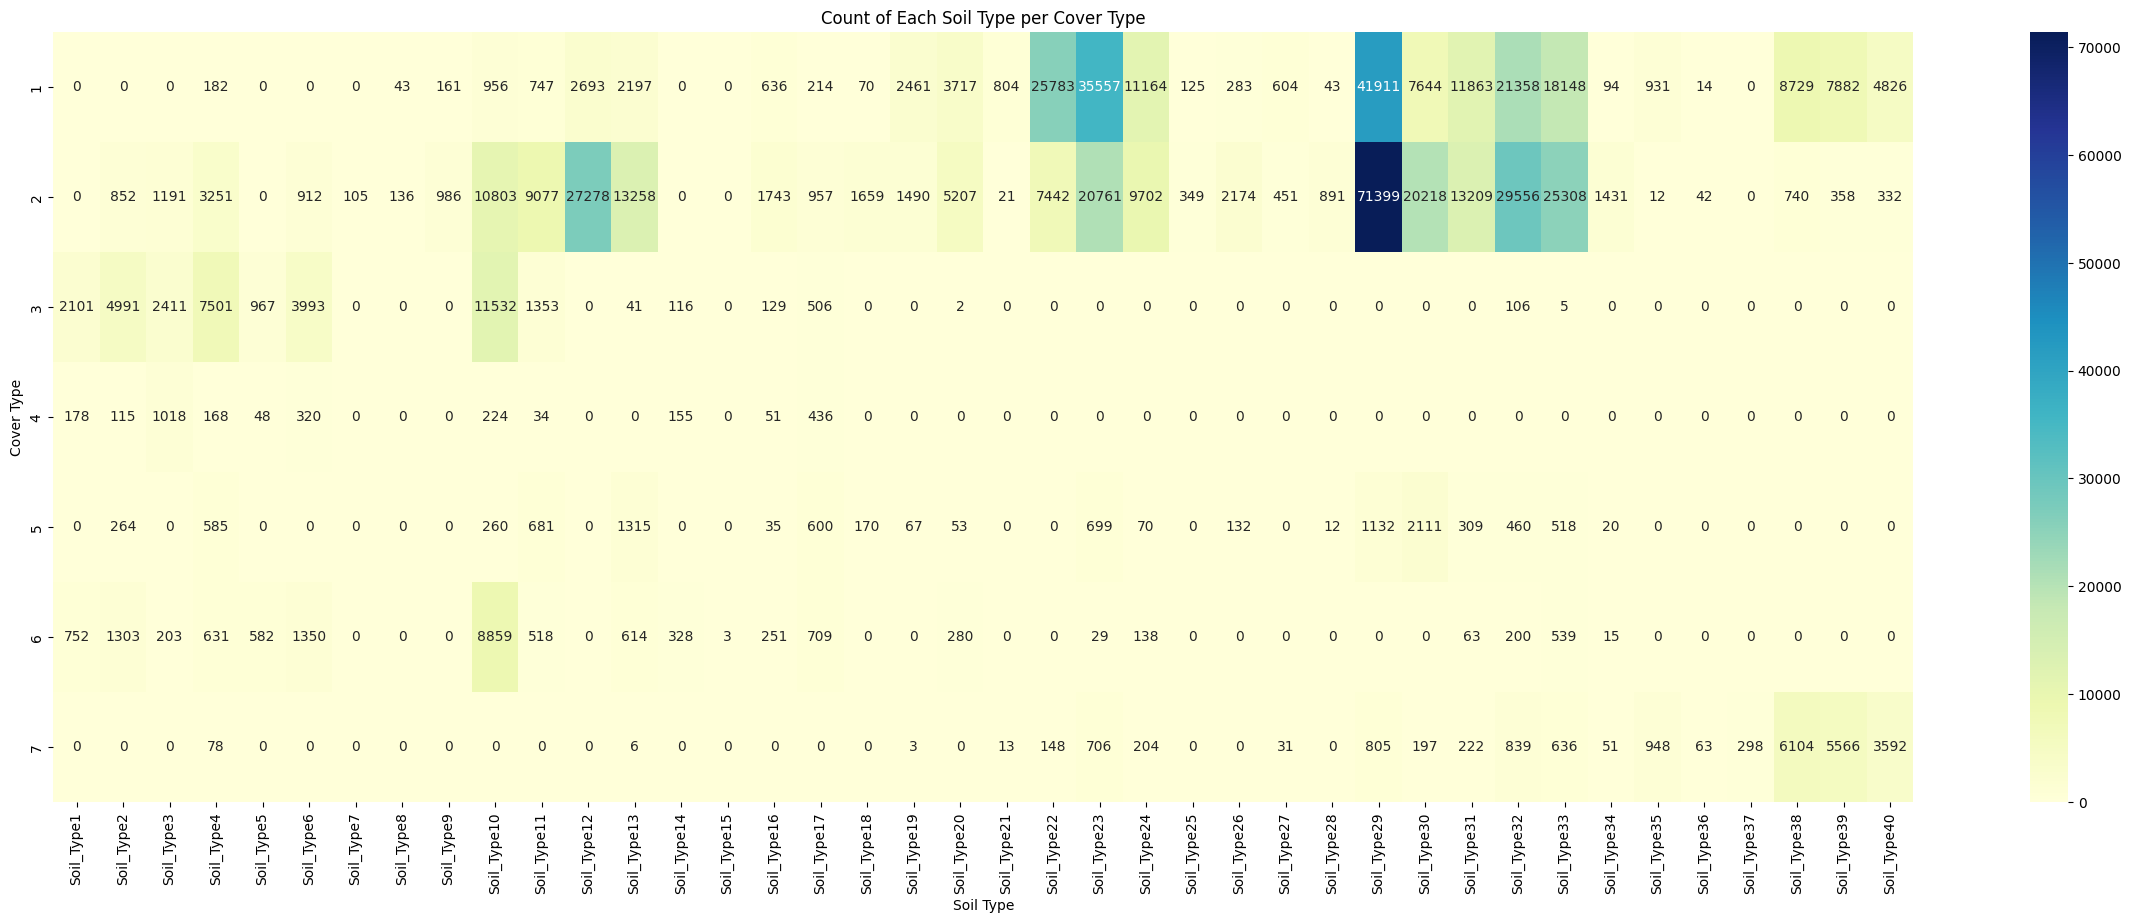

In [ ]:
soil_features = [f'Soil_Type{i}' for i in range(1, 41)]
cover_types = sorted(df['Cover_Type'].unique())

#visualizing the present soil_types per class
plot_data = pd.DataFrame(index=cover_types, columns=soil_features)

for cover in cover_types:
    subset = df[df['Cover_Type'] == cover]
    plot_data.loc[cover] = subset[soil_features].sum()

plot_data = plot_data.astype(int)
# heatmap
plt.figure(figsize=(30,10))
sns.heatmap(plot_data, annot=True, fmt="d", cmap='YlGnBu')
plt.title('Count of Each Soil Type per Cover Type')
plt.xlabel('Soil Type')
plt.ylabel('Cover Type')
plt.show()

- Some covertypes are highly charecterized by certain soil types remarkably ( covert type 2 , by soil 29 , 32 , 12)
- same for other categorical features
- the high imbalance across cover types classes prevents us from drawing conclusions about the less represented classes

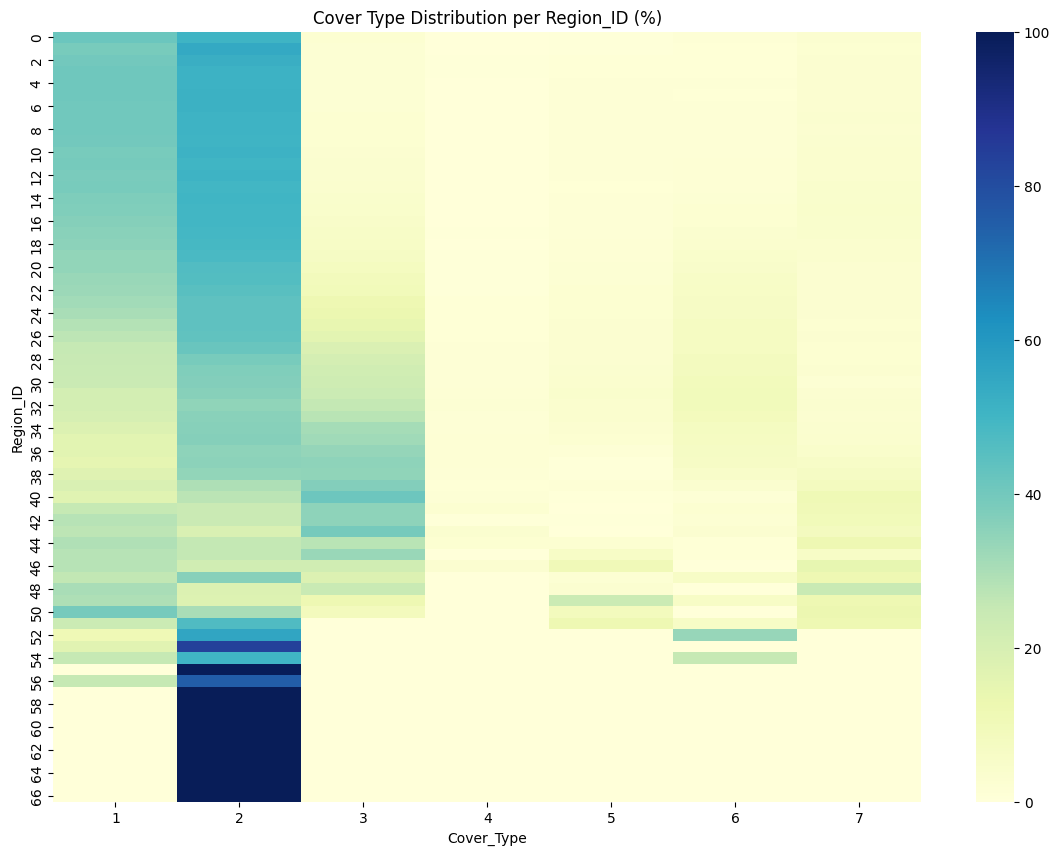

In [ ]:
# region id
ct = pd.crosstab(df['Region_ID'], df['Cover_Type'], normalize='index') * 100

plt.figure(figsize=(14, 10))
sns.heatmap(ct, cmap="YlGnBu", annot=False)
plt.title("Cover Type Distribution per Region_ID (%)")
plt.xlabel("Cover_Type")
plt.ylabel("Region_ID")
plt.show()

Region_ID  is not balanced per cover type class ( class 4 is rare ), but it is useful for seperating fairly presented classes


## EDA Conclusions
- High class imbalance across cover type
- High class imbalance in categorical features Hillshade_3pm and Wilderness_Area , other categorical features are fairly balanced
- elevation ,slope , Horizontal_Distance_To_Roadways are best at seperating classes
- Many outliers are present across featurs and target classes

# Data Preprocessing and model training

In [ ]:
#split features into numerical and categorical
features = ['X_Coord','Y_Coord','Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways',
    'Hillshade_9am']
categorical_features = ['Hillshade_Noon','Hillshade_3pm','Wilderness_Area',
                        'Horizontal_Distance_To_Fire_Points']
soil_features = [f'Soil_Type{i}' for i in range(1, 41)]
categorical_features += soil_features

In [ ]:
#split to train and validation data
from sklearn.model_selection import train_test_split
X = df.drop("Cover_Type", axis=1)    #features
y = df["Cover_Type"]    #target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## testing different preprocessing pipelines X model combinations


### tree based models

**Random forest classifier**

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
# tree based models
# no scaling needed
preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", features + ["Region_ID"]),
        ("binary", "passthrough", features),
        ("soil", "passthrough", soil_features)
    ]
)

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        class_weight="balanced"  #because classes are imbalanced
    ))
])
#train the model
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['X_Coord', 'Y_Coord',
                                                   'Elevation', 'Aspect',
                                                   'Slope',
                                                   'Horizontal_Distance_To_Hydrology',
                                                   'Vertical_Distance_To_Hydrology',
                                                   'Horizontal_Distance_To_Roadways',
                                                   'Hillshade_9am',
                                                   'Region_ID']),
                                                 ('binary', 'passthrough',
                                                  ['X_Coord', 'Y_Coord',
                                                   'Elevation', 'Aspect',
                                                   'Slope',
                                                   'Horizont...
                                                   'Soil_Type13', 'Soil_Type14',
                                                   'Soil_Type15', 'Soil_Type16',
                                                   'Soil_Type17', 'Soil_Type18',
                                                   'Soil_Type19', 'Soil_Type20',
                                                   'Soil_Type21', 'Soil_Type22',
                                                   'Soil_Type23', 'Soil_Type24',
                                                   'Soil_Type25', 'Soil_Type26',
                                                   'Soil_Type27', 'Soil_Type28',
                                                   'Soil_Type29', 'Soil_Type30', ...])])),
                ('model',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=200, random_state=42))])

In [ ]:
#evaluate
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score

y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))
print("balanced accuracy",balanced_accuracy_score(y_test, y_pred))

**Xg boost**

In [ ]:
from sklearn.compose import ColumnTransformer
import xgboost as xgb
from sklearn.pipeline import Pipeline
# tree based models
# no scaling needed
preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", features + ["Region_ID"]),
        ("binary", "passthrough", features),
        ("soil", "passthrough", soil_features)
    ]
)

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", xgb.XGBClassifier(objective="multi:softprob", random_state=42))
])
# encode labels from 0 to 6
y_train_encoded = y_train - 1
y_test_encoded  = y_test - 1

#train the model
pipeline.fit(X_train,y_train_encoded)

In [ ]:
#evaluate
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score

y_pred = pipeline.predict(X_test)
print(classification_report(y_test_encoded, y_pred))
print("balanced accuracy",balanced_accuracy_score(y_test_encoded, y_pred))

- the dataset is simple and of moderate size , no need for boosted algorithmes
- random forest classifier is more effective than Xgboost for this task

### testing linear models

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

# log transformer to handle right skewed features (outliers)
class LogTransform(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        X = np.asarray(X)
        #make all vals > 0 ( ignore 0's)
        self.shift_ = -np.min(X, axis=0) + 1e-6
        return self

    def transform(self, X):
        X = np.asarray(X)
        Z = X + self.shift_
        Z = np.clip(Z, 1e-6, None)  #NOTHING <= 0
        return np.log1p(Z)


# reflect then apply log transform
class ReflectLogTransform(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        X = np.asarray(X)
        self.max_ = np.max(X, axis=0) + 1
        return self

    def transform(self, X):
        X = np.asarray(X)
        Z = self.max_ - X
        Z = np.clip(Z, 1e-6, None)  #clip <= 0 vals
        return np.log1p(Z)


# clip outliers transformer
class ClipOutliers(BaseEstimator, TransformerMixin):

  def fit(self ,X, y=None):
    self.lower = X.quantile(0.01)
    self.upper = X.quantile(0.99)
    return self

  def transform(self , X):
    X = np.array(X)
    X = np.clip(X, self.lower, self.upper)
    return X

In [ ]:
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

#linear regression
#features with right skewed distributions
right_skew = ['Elevation', 'Slope' , 'Aspect'] #log transform
left_skew = ['Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology']  # apply reflect +log
clipped = ['Horizontal_Distance_To_Roadways','Hillshade_9am']  # apply clip on this
#pipelines per column group
right_pipeline = Pipeline([
    ("log", LogTransform()),
    ("scale", MinMaxScaler())
])

left_pipeline = Pipeline([
    ("reflectlog", ReflectLogTransform()),
    ("scale", MinMaxScaler())
])

clip_pipeline = Pipeline([
    ("clip", ClipOutliers()),
    ("scale", MinMaxScaler())
])


preprocessor = ColumnTransformer(
    transformers=[
        ("right", right_pipeline, right_skew),        #log transform then scale
        ("left", left_pipeline, left_skew),            # reflect+ log transform then scale
        ("clip", clip_pipeline, clipped),                   #clip then scale
        ("binary", "passthrough", categorical_features),
    ]
)

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", LogisticRegression(
        max_iter=1000,
        n_jobs=-1,
        class_weight="balanced"
    ))
])


#train the model
pipeline.fit(X_train,y_train)

In [ ]:
#evaluate
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score

y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))
print("balanced accuracy",balanced_accuracy_score(y_test, y_pred))

# Model's Comparaison Conclusion
- Tree based models preform best on this dataSet
- The size of dataset and complexity does not require a boosted algorithme


In [6]:
!git add .
!git commit -m "tree based models VS linear models comparaison "
!git push

fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git


In [12]:
# sync with drive copy
from google.colab import drive
drive.mount('/content/drive')

!cp "/content/drive/MyDrive/Colab Notebooks/ForestCover.ipynb" /content/cover-type-classifcation/ForestCover.ipynb

%cd /content/cover-type-classifcation
!git status
!git diff --stat ForestCover.ipynb

Mounted at /content/drive
cp: cannot create regular file '/content/cover-type-classifcation/ForestCover.ipynb': No such file or directory
[Errno 2] No such file or directory: '/content/cover-type-classifcation'
/content
fatal: not a git repository (or any of the parent directories): .git
usage: git diff --no-index [<options>] <path> <path>

Diff output format options
    -p, --patch           generate patch
    -s, --no-patch        suppress diff output
    -u                    generate patch
    -U, --unified[=<n>]   generate diffs with <n> lines context
    -W, --function-context
                          generate diffs with <n> lines context
    --raw                 generate the diff in raw format
    --patch-with-raw      synonym for '-p --raw'
    --patch-with-stat     synonym for '-p --stat'
    --numstat             machine friendly --stat
    --shortstat           output only the last line of --stat
    -X, --dirstat[=<param1,param2>...]
                          output the d